# Malware Analysis and Detection


#### Libraries going to be used


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
%matplotlib inline
import random
random.seed(1234)

#### Reading Data From the csv File 

In [2]:
df = pd.read_csv("MalwareData.csv",sep ="|")

In [3]:
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [4]:
# The shape is use for printing the value of Rows and Columns
df.shape
legit = df[0:41323].drop(["legitimate"],axis=1)
mal = df[41323::].drop(["legitimate"],axis=1)
print("The shape of the legit dataset is : %s sample ,%s features "%(legit.shape[0],legit.shape[1]))
print("The shape of the malware dataset is: %s sample,%s features "%(mal.shape[0],mal.shape[1]))

The shape of the legit dataset is : 41323 sample ,56 features 
The shape of the malware dataset is: 96724 sample,56 features 


### Shuffling the data
### As in this csv file 
#### legitimate file : 0-41,323
#### virus file : 41,324-96,724

In [5]:
df=df.sample(frac=1).reset_index()
df

,index,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,113393,VirusShare_1b1fb608a0d35058560043e6654826f4,1b1fb608a0d35058560043e6654826f4,332,224,258,9,0,648704,284160,...,4,4.567691,1.919241,7.965693,19862.000000,20,69121,72,0,0
1,137192,VirusShare_4f9f8b7d9256cbec9993b7a0dfad0baf,4f9f8b7d9256cbec9993b7a0dfad0baf,332,224,258,10,0,119808,385024,...,6,3.752798,2.458492,5.317552,2738.833333,48,9640,72,15,0
2,15549,ExplorerFrame.dll,1c27e145ec99f20bc1b13fd98165a83f,34404,240,8226,9,0,1132544,730624,...,86,4.228483,0.650022,6.375099,4602.011628,6,60351,0,16,1
3,122706,VirusShare_e4fcba33bf46f3f5332810139e907b1c,e4fcba33bf46f3f5332810139e907b1c,332,224,258,10,0,118272,380416,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
4,34093,dxmasf.dll,855056f06f3677063db2cc51899bc216,34404,240,8226,9,0,1536,4096,...,1,3.548214,3.548214,3.548214,924.000000,924,924,0,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,9500,FORM.DLL,c0f7d8b2cdf87a84854c766cf46478c1,34404,240,8226,9,0,84992,148992,...,2,4.227880,3.428561,5.027199,898.000000,600,1196,0,18,1
138043,27037,ieUnatt.exe,988ab676fbf4484508ba134caab711eb,332,224,258,11,0,89088,28672,...,3,3.749515,2.749457,4.939626,697.666667,200,993,92,16,1
138044,66293,VirusShare_af84bda7538eba668b8d11c8c759548d,af84bda7538eba668b8d11c8c759548d,332,224,258,10,0,118272,380416,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,27726,install.res.1046.dll,057cef1bbd678762495e86272b1b9d10,34404,240,8226,10,0,0,43008,...,32,2.795378,0.960066,3.761171,1275.687500,20,28824,0,16,1


In [6]:
#  The describe() method is used for calculating data like percentile, mean and std of the numerical values of the Series or DataFrame. 
df.describe()

,index,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,69023.000000,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,39850.880643,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,0.000000,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,34511.500000,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,69023.000000,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,103534.500000,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,138046.000000,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [7]:
# This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
print(df.columns)

Index(['index', 'Name', 'md5', 'Machine', 'SizeOfOptionalHeader',
       'Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion',
       'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
    

In [8]:
# Drop the Index Column
df = df.drop(["index"],axis=1)
df

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,VirusShare_1b1fb608a0d35058560043e6654826f4,1b1fb608a0d35058560043e6654826f4,332,224,258,9,0,648704,284160,0,...,4,4.567691,1.919241,7.965693,19862.000000,20,69121,72,0,0
1,VirusShare_4f9f8b7d9256cbec9993b7a0dfad0baf,4f9f8b7d9256cbec9993b7a0dfad0baf,332,224,258,10,0,119808,385024,0,...,6,3.752798,2.458492,5.317552,2738.833333,48,9640,72,15,0
2,ExplorerFrame.dll,1c27e145ec99f20bc1b13fd98165a83f,34404,240,8226,9,0,1132544,730624,0,...,86,4.228483,0.650022,6.375099,4602.011628,6,60351,0,16,1
3,VirusShare_e4fcba33bf46f3f5332810139e907b1c,e4fcba33bf46f3f5332810139e907b1c,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
4,dxmasf.dll,855056f06f3677063db2cc51899bc216,34404,240,8226,9,0,1536,4096,0,...,1,3.548214,3.548214,3.548214,924.000000,924,924,0,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,FORM.DLL,c0f7d8b2cdf87a84854c766cf46478c1,34404,240,8226,9,0,84992,148992,0,...,2,4.227880,3.428561,5.027199,898.000000,600,1196,0,18,1
138043,ieUnatt.exe,988ab676fbf4484508ba134caab711eb,332,224,258,11,0,89088,28672,0,...,3,3.749515,2.749457,4.939626,697.666667,200,993,92,16,1
138044,VirusShare_af84bda7538eba668b8d11c8c759548d,af84bda7538eba668b8d11c8c759548d,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,install.res.1046.dll,057cef1bbd678762495e86272b1b9d10,34404,240,8226,10,0,0,43008,0,...,32,2.795378,0.960066,3.761171,1275.687500,20,28824,0,16,1


### Legitimate files : contain **(.exe) and (.dll) extension** format
### Malware Files : **start with "VirusShare_"

### Correlation
#### Pearson Correlation.

In [9]:
corr = df.corr("pearson")
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\user.DESKTOP-V9Q1ERT\AppData\Local\Temp\ipykernel_11484\4102759603.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr("pearson")
C:\Users\user.DESKTOP-V9Q1ERT\AppData\Local\Temp\ipykernel_11484\4102759603.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
Machine,1.00,1.00,0.11,0.05,-0.11,0.01,-0.00,-0.00,0.01,-0.00,-0.04,0.01,-0.00,-0.04,0.00,0.00,0.06,0.06,0.43,-0.00,0.01,-0.01,-0.11,0.30,-0.37,-0.32,0.01,-0.10,-0.00,-0.00,-0.00,0.02,-0.20,-0.07,-0.36,0.00,0.05,0.00,0.00,0.04,0.00,0.08,0.12,0.08,0.06,0.06,-0.09,0.16,-0.19,-0.00,-0.00,-0.00,-0.01,0.21,0.55
SizeOfOptionalHeader,1.00,1.00,0.11,0.04,-0.11,0.01,-0.00,-0.00,0.01,-0.00,-0.04,0.01,-0.00,-0.04,0.00,0.00,0.06,0.06,0.43,-0.00,0.01,-0.01,-0.11,0.30,-0.37,-0.32,0.01,-0.10,-0.00,-0.00,-0.00,0.02,-0.20,-0.07,-0.36,0.00,0.05,0.00,0.00,0.04,0.00,0.08,0.11,0.08,0.06,0.06,-0.09,0.16,-0.19,-0.00,-0.00,-0.00,-0.01,0.21,0.55
Characteristics,0.11,0.11,1.00,-0.40,0.39,0.01,-0.00,0.00,0.05,0.01,0.09,-0.00,-0.00,0.02,-0.01,-0.00,0.02,0.02,-0.14,0.00,0.02,0.02,0.08,0.13,-0.55,-0.16,0.14,-0.05,0.00,0.00,0.00,0.16,-0.52,-0.36,-0.27,0.01,0.02,0.01,0.01,0.02,0.01,0.25,0.01,0.01,0.03,0.08,-0.13,-0.07,-0.15,-0.00,-0.00,-0.00,-0.01,0.08,0.22
MajorLinkerVersion,0.05,0.04,-0.40,1.00,-0.36,0.05,0.02,0.21,-0.02,0.06,-0.03,0.00,0.00,-0.01,0.00,-0.00,0.01,0.01,0.35,-0.00,-0.00,-0.01,0.01,0.01,0.20,-0.12,-0.07,0.01,-0.00,-0.00,-0.00,-0.14,0.33,0.33,0.13,-0.00,0.01,-0.01,-0.00,0.01,-0.00,-0.16,-0.00,0.02,-0.00,-0.02,0.11,0.11,0.08,-0.01,-0.00,-0.00,-0.00,0.05,0.02
MinorLinkerVersion,-0.11,-0.11,0.39,-0.36,1.00,0.02,0.00,0.08,0.03,0.03,0.04,-0.00,-0.00,-0.03,0.00,0.04,-0.01,-0.01,-0.38,0.01,0.00,0.01,0.03,-0.08,-0.12,0.33,0.07,0.01,0.01,0.01,0.01,0.27,-0.37,-0.35,-0.08,-0.00,-0.02,-0.00,0.00,-0.01,-0.00,0.19,0.02,-0.03,-0.01,0.01,-0.05,-0.12,0.00,-0.00,-0.00,-0.00,-0.01,-0.28,-0.15
SizeOfCode,0.01,0.01,0.01,0.05,0.02,1.00,0.46,0.00,0.02,0.84,0.04,0.00,-0.00,0.01,0.00,-0.00,0.01,0.01,0.01,-0.00,0.03,0.00,-0.01,0.00,-0.03,-0.01,0.00,0.00,-0.00,-0.00,0.00,0.01,0.00,-0.01,-0.00,0.00,-0.00,0.00,0.01,0.00,0.01,0.02,0.06,0.04,0.03,0.03,0.00,-0.03,0.01,-0.00,-0.00,0.00,-0.00,0.01,0.02
SizeOfInitializedData,-0.00,-0.00,-0.00,0.02,0.00,0.46,1.00,-0.00,0.00,0.21,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.15,0.00,0.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.02,0.00,0.07,0.02,0.08,-0.00,0.01,0.01,0.00,0.02,-0.00,-0.02,0.00,0.00,-0.00,0.00,-0.00,-0.01,-0.00
SizeOfUninitializedData,-0.00,-0.00,0.00,0.21,0.08,0.00,-0.00,1.00,0.00,0.00,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.01,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.01,-0.00,-0.01,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.01,-0.02,-0.01,-0.00,-0.00,0.00,-0.00,-0.01,-0.00
AddressOfEntryPoint,0.01,0.01,0.05,-0.02,0.03,0.02,0.00,0.00,1.00,0.04,0.17,0.00,0.18,0.01,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.22,0.01,-0.01,-0.00,-0.03,0.00,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.02,0.01,0.01,-0.00,0.00,0.06,-0.00,0.07,0.04,0.01,0.01,0.02,0.02,0.02,-0.04,0.02,-0.00,-0.00,0.00,-0.00,0.00,-0.00
BaseOfCode,-0.00,-0.00,0.01,0.06,0.03,0.84,0.21,0.00,0.04,1.00,0.08,0.00,0.11,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,0.07,0.00,-0.00,-0.00,-0.01,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.01,-

C:\Users\user.DESKTOP-V9Q1ERT\AppData\Local\Temp\ipykernel_11484\3614379712.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


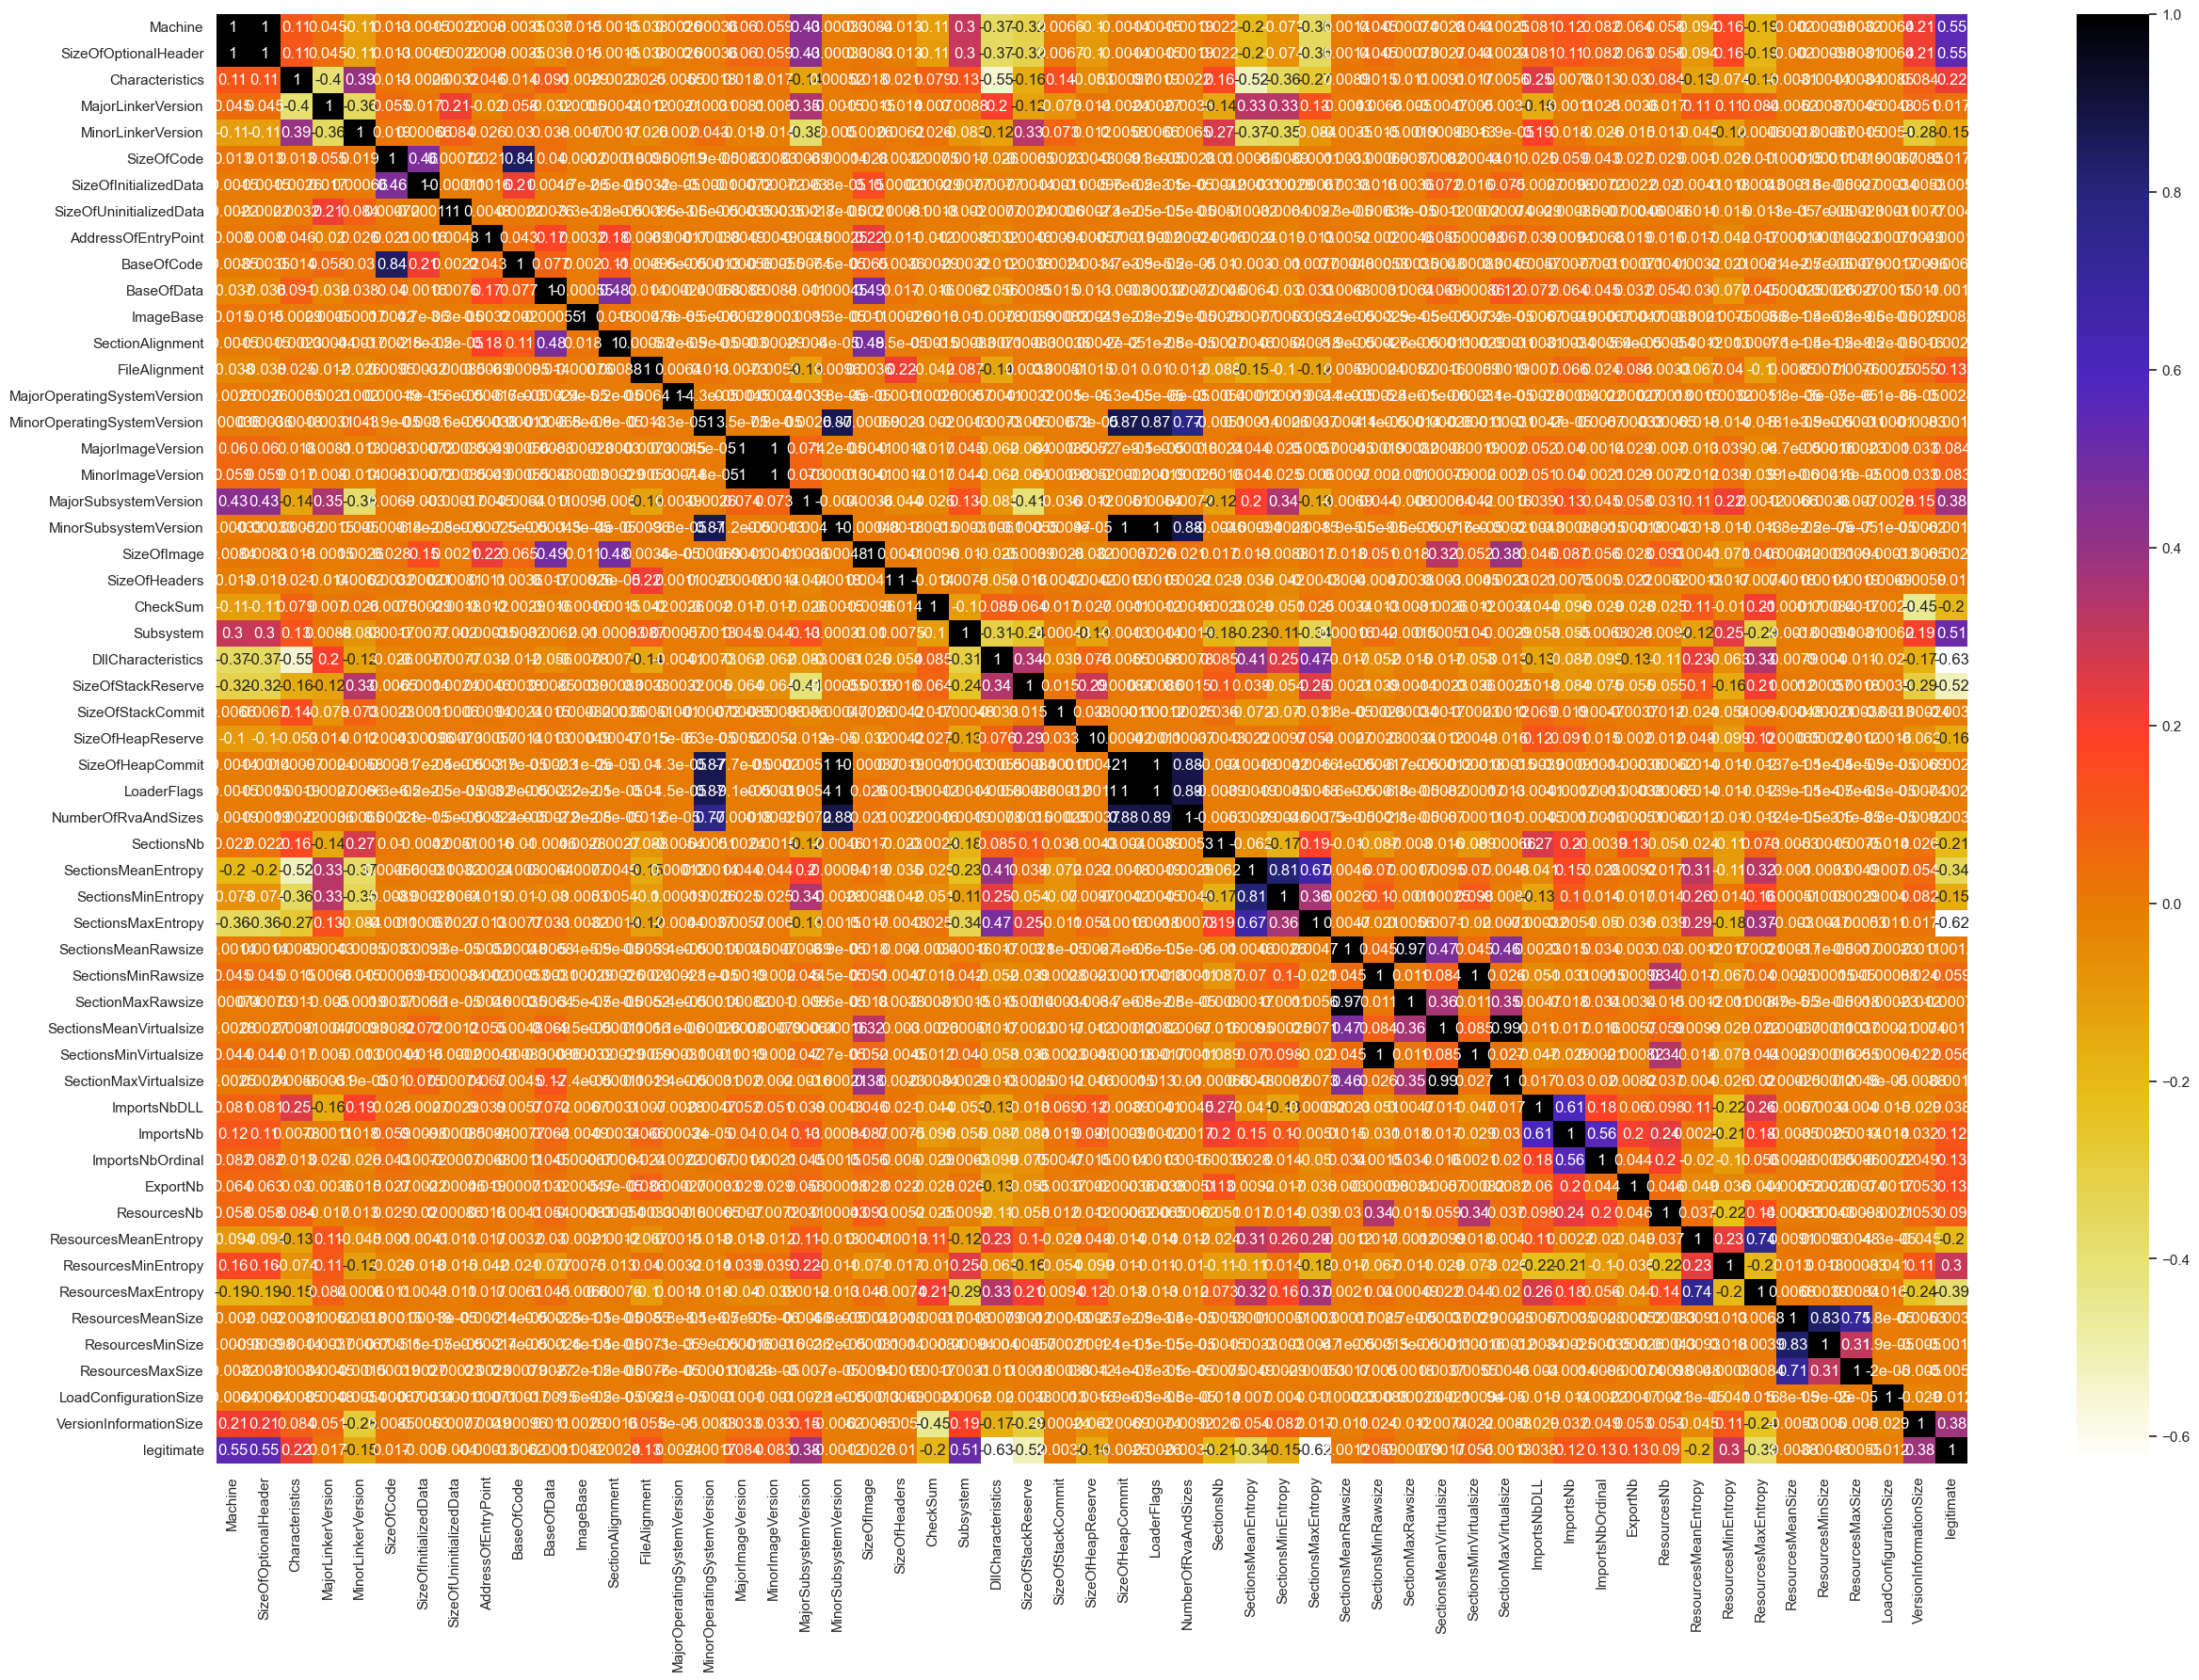

In [10]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## Find the correlation between every pair of columns
### Correlation: +1 to -1
### +1 highest positive correlation
### -1 highest negative correlation
### 0 there is no correlation or two variables are independent of each other


# Features Selection :
## Correlation with output variable
### Print all those columns which have 
### absolute correlation with target column (legitimate) > 0.2

In [11]:
corr_target = abs(corr['legitimate'])

In [12]:
print(corr_target.sort_values())

AddressOfEntryPoint            0.000134
SectionMaxRawsize              0.000790
BaseOfData                     0.001136
SectionsMeanRawsize            0.001175
MinorSubsystemVersion          0.001213
SectionMaxVirtualsize          0.001332
MinorOperatingSystemVersion    0.001702
SectionsMeanVirtualsize        0.001734
ResourcesMinSize               0.001774
MajorOperatingSystemVersion    0.002402
SectionAlignment               0.002429
SizeOfHeapCommit               0.002506
SizeOfImage                    0.002603
LoaderFlags                    0.002649
SizeOfStackCommit              0.003226
NumberOfRvaAndSizes            0.003523
ResourcesMeanSize              0.003824
SizeOfUninitializedData        0.003997
SizeOfInitializedData          0.004958
ResourcesMaxSize               0.005529
BaseOfCode                     0.006232
ImageBase                      0.008245
SizeOfHeaders                  0.010125
LoadConfigurationSize          0.011666
MajorLinkerVersion             0.017320


## Selecting highly correlated features

In [13]:
relevant_features = corr_target[corr_target>0.2]
relevant_features
df1 = relevant_features.sort_values()
df1

ResourcesMeanEntropy      0.202432
SectionsNb                0.207782
Characteristics           0.221956
ResourcesMinEntropy       0.299112
SectionsMeanEntropy       0.343933
VersionInformationSize    0.379646
MajorSubsystemVersion     0.380393
ResourcesMaxEntropy       0.392855
Subsystem                 0.514352
SizeOfStackReserve        0.521642
SizeOfOptionalHeader      0.547498
Machine                   0.548835
SectionsMaxEntropy        0.624229
DllCharacteristics        0.630177
legitimate                1.000000
Name: legitimate, dtype: float64

In [14]:
col = ["ResourcesMeanEntropy","SectionsNb","Characteristics","ResourcesMinEntropy","SectionsMeanEntropy","VersionInformationSize","MajorSubsystemVersion","ResourcesMaxEntropy","Subsystem","SizeOfStackReserve","SizeOfOptionalHeader","Machine","SizeOfOptionalHeader","DllCharacteristics"]
df2 = df[col]
df2.head()

,ResourcesMeanEntropy,SectionsNb,Characteristics,ResourcesMinEntropy,SectionsMeanEntropy,VersionInformationSize,MajorSubsystemVersion,ResourcesMaxEntropy,Subsystem,SizeOfStackReserve,SizeOfOptionalHeader,Machine,SizeOfOptionalHeader,DllCharacteristics
0,4.567691,5,258,1.919241,5.898601,0,5,7.965693,2,1048576,224,332,224,33088
1,3.752798,5,258,2.458492,5.659356,15,5,5.317552,2,1048576,224,332,224,33088
2,4.228483,6,8226,0.650022,5.148652,16,6,6.375099,2,262144,240,34404,240,320
3,6.825406,5,258,2.617026,5.659426,14,5,7.990487,2,1048576,224,332,224,33088
4,3.548214,5,8226,3.548214,1.912429,16,6,3.548214,2,262144,240,34404,240,320


## Visualization

C:\Users\user.DESKTOP-V9Q1ERT\AppData\Local\Temp\ipykernel_11484\3859468625.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df["ResourcesMeanEntropy"], ax = ax[0,0])
C:\Users\user.DESKTOP-V9Q1ERT\AppData\Local\Temp\ipykernel_11484\3859468625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

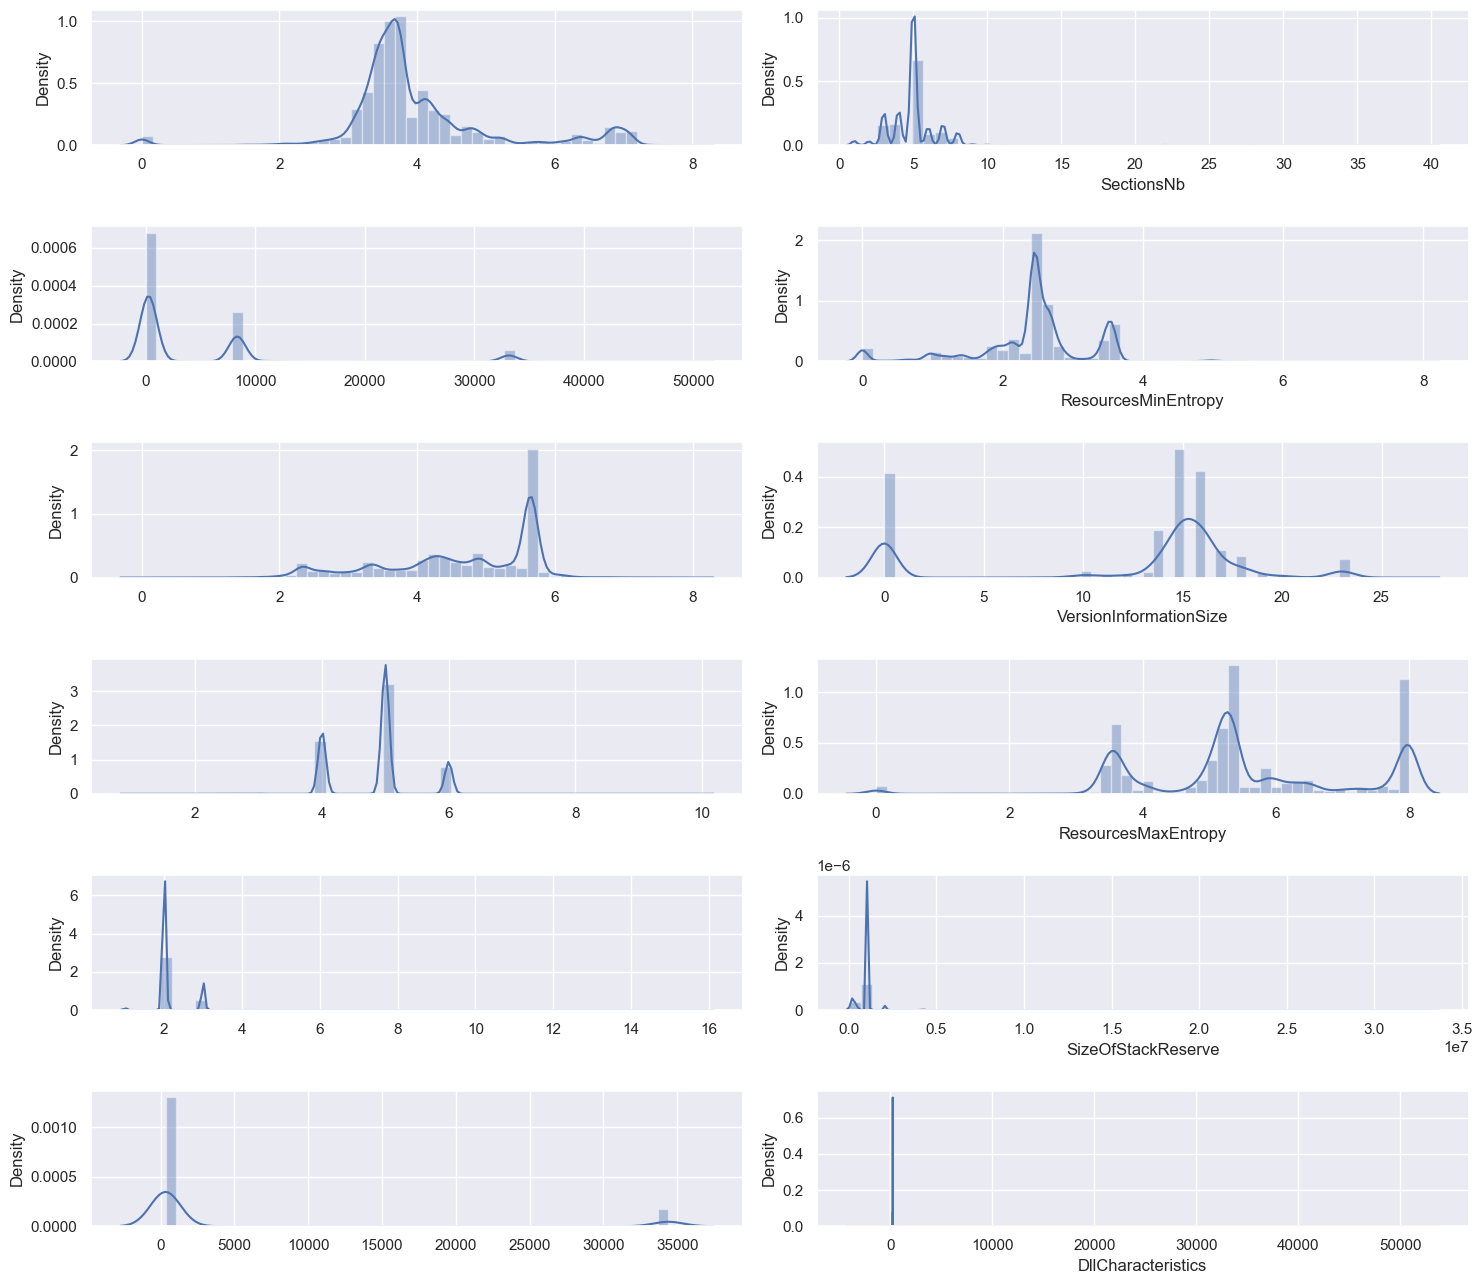

In [15]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.distplot(x= df["ResourcesMeanEntropy"], ax = ax[0,0])
sns.distplot(df['SectionsNb'], ax = ax[0,1])
sns.distplot(x= df["Characteristics"], ax = ax[1,0])
sns.distplot(df['ResourcesMinEntropy'], ax = ax[1,1])
sns.distplot(x= df["SectionsMeanEntropy"], ax = ax[2,0])
sns.distplot(df['VersionInformationSize'], ax = ax[2,1])
sns.distplot(x= df["MajorSubsystemVersion"], ax = ax[3,0])
sns.distplot(df['ResourcesMaxEntropy'], ax = ax[3,1])
sns.distplot(x= df["Subsystem"], ax = ax[4,0])
sns.distplot(df['SizeOfStackReserve'], ax = ax[4,1])
sns.distplot(x= df["Machine"], ax = ax[5,0])
sns.distplot(df['SizeOfOptionalHeader'], ax = ax[5,1])
sns.distplot(df['DllCharacteristics'], ax = ax[5,1])
plt.tight_layout()

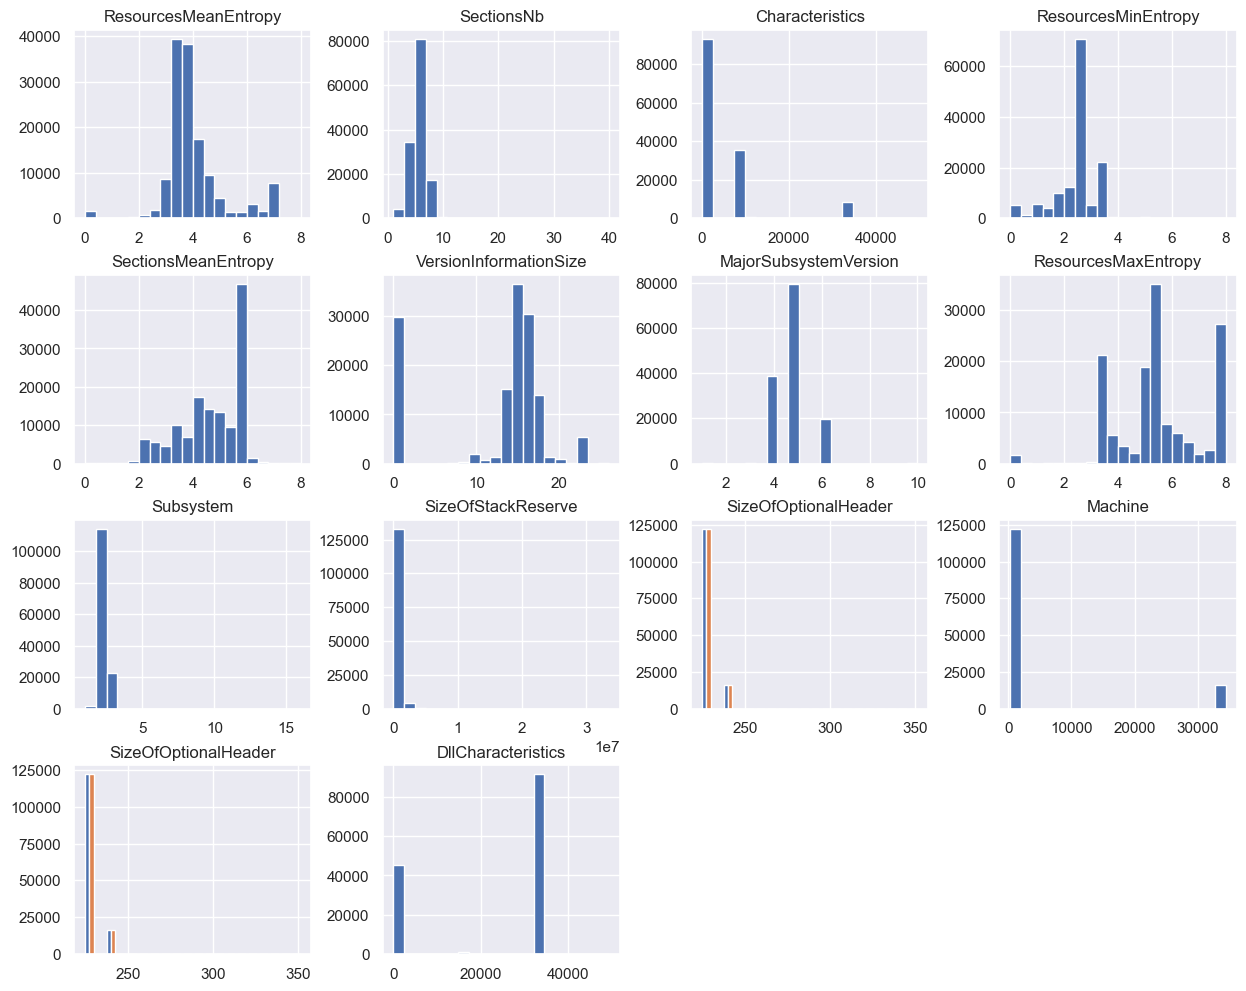

In [16]:
df2.hist(figsize=(15,12),bins=20)
plt.show()

## Split the data in X Train and Y Train

In [17]:
X = df[["ResourcesMeanEntropy","SectionsNb","Characteristics","ResourcesMinEntropy","SectionsMeanEntropy","VersionInformationSize","MajorSubsystemVersion","ResourcesMaxEntropy","Subsystem","SizeOfStackReserve","SizeOfOptionalHeader","Machine","SizeOfOptionalHeader","DllCharacteristics"]]
Y = df['legitimate'] 

## Split the data in Training and testing
### To Check the shape of X train and test , Y train and test

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [19]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((96632, 14), (41415, 14), (96632,), (41415,))

## Apply Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [21]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [22]:
accuracy1 = (dtc.score(X_test, Y_test))*100
accuracy1

98.98828926717374

### Construct a Tree using Graphviz

In [23]:
import graphviz
from sklearn import tree
TREE = tree.export_graphviz(dtc, out_file=None, 
                        feature_names=list(X_train),  
                       filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(TREE)  
#graph 


# Ensemble techniques

## **Apply Random Forest Classifier** 

In [24]:
from sklearn.ensemble import RandomForestClassifier
rcf = RandomForestClassifier(n_estimators=50,random_state=7)


### fit the model in X_train and Y_train

In [25]:
rcf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50, random_state=7)

## Predict the Accuracy and Score 

In [26]:
accuracy2 = (rcf.score(X_test, Y_test))*100
accuracy2

99.31908728721478

### Draw the Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
result = rcf.predict(X_test)
conf = confusion_matrix(Y_test,result)
conf

array([[28741,   161],
       [  121, 12392]], dtype=int64)

In [29]:
type(conf)

numpy.ndarray

In [30]:
print("False Positive : ",conf[0][1]/sum(conf[0])*100)
print("False Negative : ",conf[1][0]/sum(conf[1])*100)

False Positive :  0.5570548750951491
False Negative :  0.9669943259010629


In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,result))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28902
           1       0.99      0.99      0.99     12513

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



## **Apply Gradient Boosting Classifier** 

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50)

### fit the model in X_train and Y_train

In [33]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=50)

### Predict the Accuracy and Score 

In [34]:
gbc.predict(X_test)


array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
accuracy3 = (gbc.score(X_test, Y_test))*100
accuracy3

98.61402873355064

In [36]:
x= ["Decision Tree","Random Forest","Gradient Boost"]
print("Accuries of the \nDecison tree :  ",accuracy1," \nRandom Forest : ",accuracy2," \nGradient Boost: ",accuracy3)
y =np.array([accuracy1, accuracy2, accuracy3])

Accuries of the 
Decison tree :   98.98828926717374  
Random Forest :  99.31908728721478  
Gradient Boost:  98.61402873355064


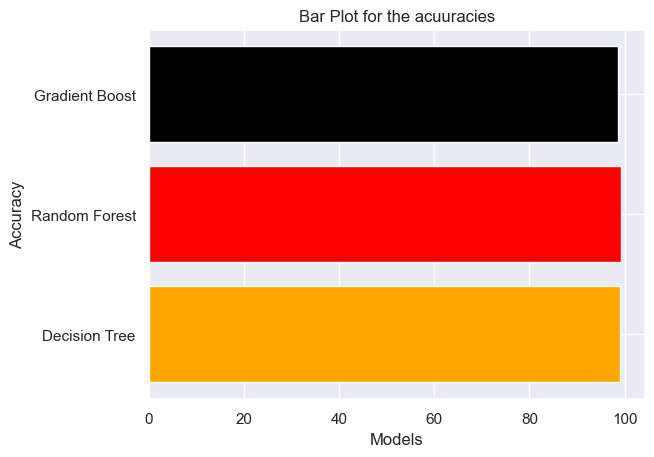

In [37]:
plt.barh(x,y,color=['orange', 'red', 'black'])
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title('Bar Plot for the acuuracies')
plt.show()


## **Performing the Prediction-model on the Sample Test Data** 

In [38]:
t = X_test.head(1)
t

,ResourcesMeanEntropy,SectionsNb,Characteristics,ResourcesMinEntropy,SectionsMeanEntropy,VersionInformationSize,MajorSubsystemVersion,ResourcesMaxEntropy,Subsystem,SizeOfStackReserve,SizeOfOptionalHeader,Machine,SizeOfOptionalHeader,DllCharacteristics
94191,3.532028,4,8450,3.532028,4.756795,16,5,3.532028,3,262144,224,332,224,320


In [39]:
t=np.array(t)
t

array([[3.53202754e+00, 4.00000000e+00, 8.45000000e+03, 3.53202754e+00,
        4.75679500e+00, 1.60000000e+01, 5.00000000e+00, 3.53202754e+00,
        3.00000000e+00, 2.62144000e+05, 2.24000000e+02, 3.32000000e+02,
        2.24000000e+02, 3.20000000e+02]])

In [40]:
result = rcf.predict(t)
result

c:\Users\user.DESKTOP-V9Q1ERT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [41]:
result[0]

1

In [42]:
Y_test.head(1)

94191    1
Name: legitimate, dtype: int64

In [43]:
df.iloc[94191]

Name                                               hpzllw71.dll
md5                            9685375fbce17a1587210843265fa45e
Machine                                                     332
SizeOfOptionalHeader                                        224
Characteristics                                            8450
MajorLinkerVersion                                            9
MinorLinkerVersion                                            0
SizeOfCode                                                33280
SizeOfInitializedData                                      6656
SizeOfUninitializedData                                       0
AddressOfEntryPoint                                       26574
BaseOfCode                                                 4096
BaseOfData                                                40960
ImageBase                                           268435456.0
SectionAlignment                                           4096
FileAlignment                           

In [44]:
import pickle
with open ("model.pkl","wb") as file:
    pickle.dump(rcf,file)

In [45]:
with open("model.pkl","rb") as file:
    model = pickle.load(file)

In [46]:
print(model.predict(t))

[1]


c:\Users\user.DESKTOP-V9Q1ERT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [47]:
def get_entropy(data):
    if len(data) == 0:
        return 0.0
    occurences = array.array('L', [0] * 256)
    for x in data:
        occurences[x if isinstance(x, int) else ord(x)] += 1

    entropy = 0
    for x in occurences:
        if x:
            p_x = float(x) / len(data)
            entropy -= p_x * math.log(p_x, 2)

    return entropy


def get_resources(pe):
    """Extract resources :
    [entropy, size]"""
    resources = []
    if hasattr(pe, 'DIRECTORY_ENTRY_RESOURCE'):
        try:
            for resource_type in pe.DIRECTORY_ENTRY_RESOURCE.entries:
                if hasattr(resource_type, 'directory'):
                    for resource_id in resource_type.directory.entries:
                        if hasattr(resource_id, 'directory'):
                            for resource_lang in resource_id.directory.entries:
                                data = pe.get_data(resource_lang.data.struct.OffsetToData,
                                                   resource_lang.data.struct.Size)
                                size = resource_lang.data.struct.Size
                                entropy = get_entropy(data)

                                resources.append([entropy, size])
        except Exception as e:
            return resources
    return resources


def get_version_info(pe):
    """Return version infos"""
    res = {}
    for fileinfo in pe.FileInfo:
        if fileinfo.Key == 'StringFileInfo':
            for st in fileinfo.StringTable:
                for entry in st.entries.items():
                    res[entry[0]] = entry[1]
        if fileinfo.Key == 'VarFileInfo':
            for var in fileinfo.Var:
                res[var.entry.items()[0][0]] = var.entry.items()[0][1]
    if hasattr(pe, 'VS_FIXEDFILEINFO'):
        res['flags'] = pe.VS_FIXEDFILEINFO.FileFlags
        res['os'] = pe.VS_FIXEDFILEINFO.FileOS
        res['type'] = pe.VS_FIXEDFILEINFO.FileType
        res['file_version'] = pe.VS_FIXEDFILEINFO.FileVersionLS
        res['product_version'] = pe.VS_FIXEDFILEINFO.ProductVersionLS
        res['signature'] = pe.VS_FIXEDFILEINFO.Signature
        res['struct_version'] = pe.VS_FIXEDFILEINFO.StrucVersion
    return res


def extract_infos(fpath):
    res = {}
    pe = pefile.PE(fpath)
    res['Machine'] = pe.FILE_HEADER.Machine
    res['SizeOfOptionalHeader'] = pe.FILE_HEADER.SizeOfOptionalHeader
    res['Characteristics'] = pe.FILE_HEADER.Characteristics
    res['MajorLinkerVersion'] = pe.OPTIONAL_HEADER.MajorLinkerVersion
    res['MinorLinkerVersion'] = pe.OPTIONAL_HEADER.MinorLinkerVersion
    res['SizeOfCode'] = pe.OPTIONAL_HEADER.SizeOfCode
    res['SizeOfInitializedData'] = pe.OPTIONAL_HEADER.SizeOfInitializedData
    res['SizeOfUninitializedData'] = pe.OPTIONAL_HEADER.SizeOfUninitializedData
    res['AddressOfEntryPoint'] = pe.OPTIONAL_HEADER.AddressOfEntryPoint
    res['BaseOfCode'] = pe.OPTIONAL_HEADER.BaseOfCode
    try:
        res['BaseOfData'] = pe.OPTIONAL_HEADER.BaseOfData
    except AttributeError:
        res['BaseOfData'] = 0
    res['ImageBase'] = pe.OPTIONAL_HEADER.ImageBase
    res['SectionAlignment'] = pe.OPTIONAL_HEADER.SectionAlignment
    res['FileAlignment'] = pe.OPTIONAL_HEADER.FileAlignment
    res['MajorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MajorOperatingSystemVersion
    res['MinorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MinorOperatingSystemVersion
    res['MajorImageVersion'] = pe.OPTIONAL_HEADER.MajorImageVersion
    res['MinorImageVersion'] = pe.OPTIONAL_HEADER.MinorImageVersion
    res['MajorSubsystemVersion'] = pe.OPTIONAL_HEADER.MajorSubsystemVersion
    res['MinorSubsystemVersion'] = pe.OPTIONAL_HEADER.MinorSubsystemVersion
    res['SizeOfImage'] = pe.OPTIONAL_HEADER.SizeOfImage
    res['SizeOfHeaders'] = pe.OPTIONAL_HEADER.SizeOfHeaders
    res['CheckSum'] = pe.OPTIONAL_HEADER.CheckSum
    res['Subsystem'] = pe.OPTIONAL_HEADER.Subsystem
    res['DllCharacteristics'] = pe.OPTIONAL_HEADER.DllCharacteristics
    res['SizeOfStackReserve'] = pe.OPTIONAL_HEADER.SizeOfStackReserve
    res['SizeOfStackCommit'] = pe.OPTIONAL_HEADER.SizeOfStackCommit
    res['SizeOfHeapReserve'] = pe.OPTIONAL_HEADER.SizeOfHeapReserve
    res['SizeOfHeapCommit'] = pe.OPTIONAL_HEADER.SizeOfHeapCommit
    res['LoaderFlags'] = pe.OPTIONAL_HEADER.LoaderFlags
    res['NumberOfRvaAndSizes'] = pe.OPTIONAL_HEADER.NumberOfRvaAndSizes

    # Sections
    res['SectionsNb'] = len(pe.sections)
    entropy = list(map(lambda x:x.get_entropy(), pe.sections))
    res['SectionsMeanEntropy'] = sum(entropy)/float(len(entropy))
    res['SectionsMinEntropy'] = min(entropy)
    res['SectionsMaxEntropy'] = max(entropy)


    raw_sizes = list(map(lambda x:x.SizeOfRawData, pe.sections))
    res['SectionsMeanRawsize'] = sum(raw_sizes)/float(len(raw_sizes))
    res['SectionsMinRawsize'] = min(raw_sizes)
    res['SectionsMaxRawsize'] = max(raw_sizes)
    virtual_sizes = list(map(lambda x:x.Misc_VirtualSize, pe.sections))
    res['SectionsMeanVirtualsize'] = sum(virtual_sizes)/float(len(virtual_sizes))
    res['SectionsMinVirtualsize'] = min(virtual_sizes)
    res['SectionMaxVirtualsize'] = max(virtual_sizes)

    #Imports
    try:
        res['ImportsNbDLL'] = len(pe.DIRECTORY_ENTRY_IMPORT)
        imports = list(sum([x.imports for x in pe.DIRECTORY_ENTRY_IMPORT], []))
        res['ImportsNb'] = len(imports)
        res['ImportsNbOrdinal'] = len(list(filter(lambda x:x.name is None, imports)))
    except AttributeError:
        res['ImportsNbDLL'] = 0
        res['ImportsNb'] = 0
        res['ImportsNbOrdinal'] = 0

    #Exports
    try:
        res['ExportNb'] = len(pe.DIRECTORY_ENTRY_EXPORT.symbols)
    except AttributeError:
        # No export
        res['ExportNb'] = 0
    #Resources
    resources= get_resources(pe)
    res['ResourcesNb'] = len(resources)
    if len(resources)> 0:
        entropy = list(map(lambda x:x[0], resources))
        res['ResourcesMeanEntropy'] = sum(entropy)/float(len(entropy))
        res['ResourcesMinEntropy'] = min(entropy)
        res['ResourcesMaxEntropy'] = max(entropy)
        sizes = list(map(lambda x:x[1], resources))
        res['ResourcesMeanSize'] = sum(sizes)/float(len(sizes))
        res['ResourcesMinSize'] = min(sizes)
        res['ResourcesMaxSize'] = max(sizes)
    else:
        res['ResourcesNb'] = 0
        res['ResourcesMeanEntropy'] = 0
        res['ResourcesMinEntropy'] = 0
        res['ResourcesMaxEntropy'] = 0
        res['ResourcesMeanSize'] = 0
        res['ResourcesMinSize'] = 0
        res['ResourcesMaxSize'] = 0

    # Load configuration size
    try:
        res['LoadConfigurationSize'] = pe.DIRECTORY_ENTRY_LOAD_CONFIG.struct.Size
    except AttributeError:
        res['LoadConfigurationSize'] = 0


    # Version configuration size
    try:
        version_infos = get_version_info(pe)
        res['VersionInformationSize'] = len(version_infos.keys())
    except AttributeError:
        res['VersionInformationSize'] = 0
    return res

In [48]:
import pefile
import os
import array
import math
import pickle
import joblib
import sys
import argparse
import os, sys, shutil, time
import re
import pandas as pd

data = extract_infos("TestDummy2.exe")

In [49]:
test=[data['ResourcesMeanEntropy'],data['SectionsNb'],data['Characteristics'],data['ResourcesMinEntropy'],data['SectionsMeanEntropy'],data['VersionInformationSize'],data['MajorSubsystemVersion'],data['ResourcesMaxEntropy'],data['Subsystem'],data['SizeOfStackReserve'],data['SizeOfOptionalHeader'],data['Machine'],data['SizeOfOptionalHeader'],data['DllCharacteristics']]

In [50]:
print(model.predict([test]))

[0]


c:\Users\user.DESKTOP-V9Q1ERT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
